In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
salary = pd.read_csv(r"C:\Users\Akshay\Desktop\intro to phython\Advanced Stats\Project\SalaryData.csv")

In [4]:
salary.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
salary.dtypes

Education     object
Occupation    object
Salary         int64
dtype: object

In [7]:
salary['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [8]:
salary['Occupation'].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [9]:
salary['Salary'].describe()

count        40.000000
mean     162186.875000
std       64860.407506
min       50103.000000
25%       99897.500000
50%      169100.000000
75%      214440.750000
max      260151.000000
Name: Salary, dtype: float64

### 1.1 

## Null and Alternate Hypothesis for One Way Anova

## a) Variable: 'Education'-
#### Null hypothesis states that the mean salary for all the three levels of education are equal.
#### Alternative hypothesis states that there is effect of "Education" level on Salary. The mean salary is different for atleast one level of education.

## H0: mu1 = mu2 = mu3
## H0: Mean salary of each education level is same.

## H1: mu1 = mu2 != m3 or mu1 != mu2 = mu3 or mu1 = mu3 != mu2 or mu1 != mu2 != mu3
## H1: The mean salary is not equal for atleast one education level.

## b) Variable: 'Occupation'-¶
#### Null hypothesis states that the mean salary for all the four levels of education are equal.
#### Alternative hypothesis states that there is effect of "Occupation" level on Salary. The mean salary is different for atleast one level of occupation.

## H0: mu1 = mu2 = mu3 = mu4
## H0: Mean salary of each occupation level is same.

## H1: The mean salary is not equal for atleast one education level.

#### Now let us change all the independent variable to categorical datatype.

In [10]:
for col in salary.drop('Salary', axis = 1).columns:
    salary[col] = salary[col].astype('category', copy = False)

In [11]:
salary.dtypes

Education     category
Occupation    category
Salary           int64
dtype: object

In [12]:
mod = ols('Salary~ Education', data = salary).fit()
anova_table = sm.stats.anova_lm(mod)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Education,2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


### Interpretation:
#### P-value is less than level of significance i.e. α < 0.05, we "Reject Null Hypothesis". We conclude that there is difference for Salary at atleast one level of education.

In [13]:
## For variable Occupation

In [14]:
mod = ols('Salary ~ Occupation', data = salary).fit()
ano_table = sm.stats.anova_lm(mod)
ano_table

,df,sum_sq,mean_sq,F,PR(>F)
Occupation,3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


### Interpretation:
#### P-value is greater than level of significance i.e. α > 0.05, we "Fail ton reject Null Hypothesis". We conclude that the Occupation does not has impact on Salary. The mean salary for each occupation is same.

### 1.4
### The null hypothesis is rejected for level of Educattion on Salary.

## 1.5

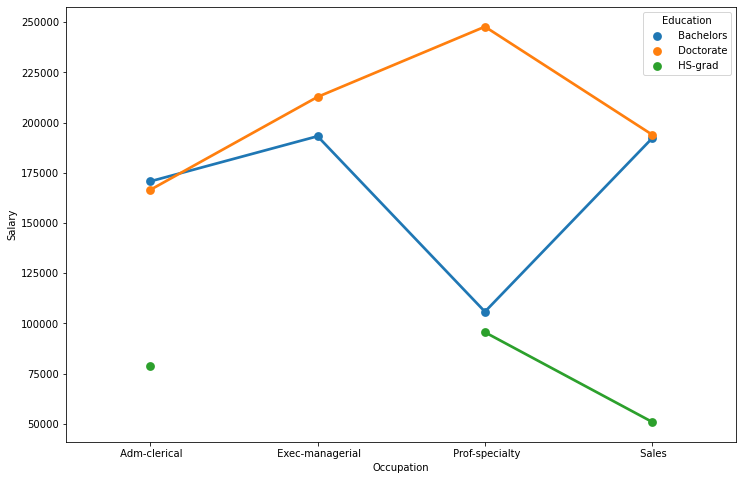

In [15]:
plot.figure(figsize=(12,8))
sns.pointplot(x = 'Occupation', y = 'Salary', hue = 'Education', data = salary, ci = None)
plot.show()

#### From the above interaction plot, since Bachelors and Doctorate lines are crossing eachother that means there is an interaction between these two variables.
#### HS Grad seems to have no interaction with occupation with respect to Other two variable.

## 1.6 Two-way Anova


#### Null hypothesis states that there is no Interaction effect between Education and Occupation
#### Alternative hypothesis states that there is Interaction effect of "Education" and "Occupation" level on Salary.

## Factor A (Row effects): 
## H0: All Salary means are equal
## H1: Not all Salary means are equal.

## Factor B (Columns effects):
## H0: All salary means are equal
## H1: Not all salary means are equal.

## Interaction effects:
## H0: There is "NO" Interaction effect between 'Education' & 'Occupation' on Salary.
## H1: There is Interaction effect between 'Education' & 'Occupation' on Salary.

In [16]:
# Two-way Anova with respect to Occupation and Education with Salary without Interaction effect

mod = ols("Salary ~ Education + Occupation", data = salary).fit()
anova_table = sm.stats.anova_lm(mod)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Education,2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
Occupation,3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


## For Two-way Anova, we observe that the p-value obtained for the 'Education' and 'Occupation is less than the level of significance i.e. α < 0.05

In [17]:
# Two-way Anova with respect to Occupation and Education along with Interaction effect

mod = ols('Salary ~ Education + Occupation + Education * Occupation', data = salary).fit()
ano_table = sm.stats.anova_lm(mod)
ano_table

,df,sum_sq,mean_sq,F,PR(>F)
Education,2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
Occupation,3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
Education:Occupation,6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


# Interpretation:

### The P-value obtained from ANOVA for Education and Occupation are statistically significant (P<0.05) and the interaction effect is also significant as p<0.05. We conclude that the type of levels of Education and Occupation separately significantly affects the Salary variable and the Interaction of both Education & Occupation also confirms that both the variable has significantly affects the Salary outcome, i.e. for the interaction term at least one of the means is different for the combination of Education and Occupation with respect to Salary.

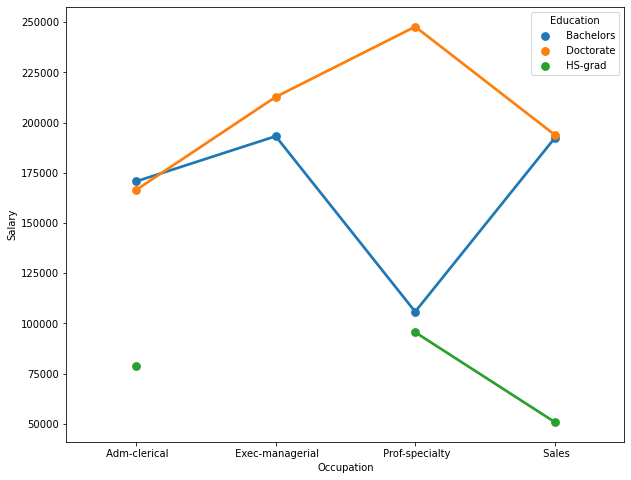

In [18]:
plot.figure(figsize=(10,8))
sns.pointplot(x = 'Occupation', y = 'Salary', hue = 'Education', data = salary, ci = None)
plot.show()

In [19]:
for col in salary.drop('Salary', axis = 1).columns:
    salary[col] = salary[col].astype('object', copy = False)
salary.dtypes

Education     object
Occupation    object
Salary         int64
dtype: object

In [20]:
from statsmodels.graphics.factorplots import interaction_plot

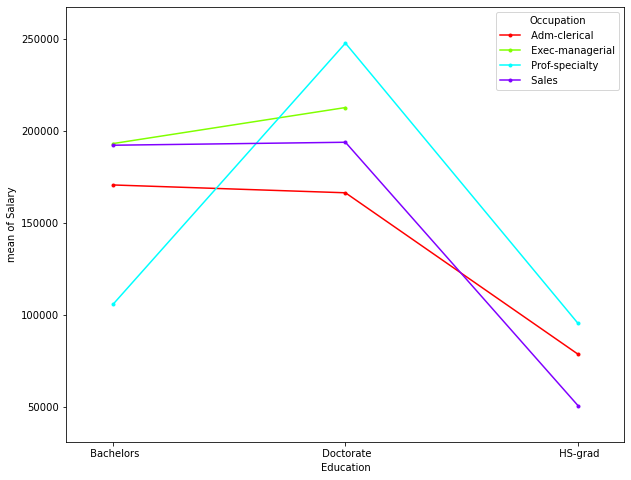

In [21]:
fig, ax = plot.subplots(figsize = (10,8))
interaction_plot(x = salary.Education, trace = salary.Occupation, response = salary.Salary, func = np.mean, ax = ax)
plot.show()

## Problem 2

In [22]:
education = pd.read_csv(r"C:\Users\Akshay\Desktop\intro to phython\Advanced Stats\Project\Education+-+Post+12th+Standard.csv")

In [23]:
education.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [24]:
education.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [25]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [26]:
education.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [27]:
education.drop(labels = 'Names', axis =1, inplace = True)
education.head(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [28]:
dups = education.duplicated()
print("The number of duplicated rows is %d" % (dups.sum()))
education[dups]

The number of duplicated rows is 0


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [29]:
education.rename(columns = {'F.Undergrad':'F_Undergrad', 'P.Undergrad':'P_Undergrad', 'Room.Board':'Room_Board', 'S.F.Ratio':'S_F_Ratio', 'perc.alumni':'Perc_Alumni', 'Grad.Rate':'Grad_Rate' }, inplace = True)


## Univariate and Bi-Variate analysis

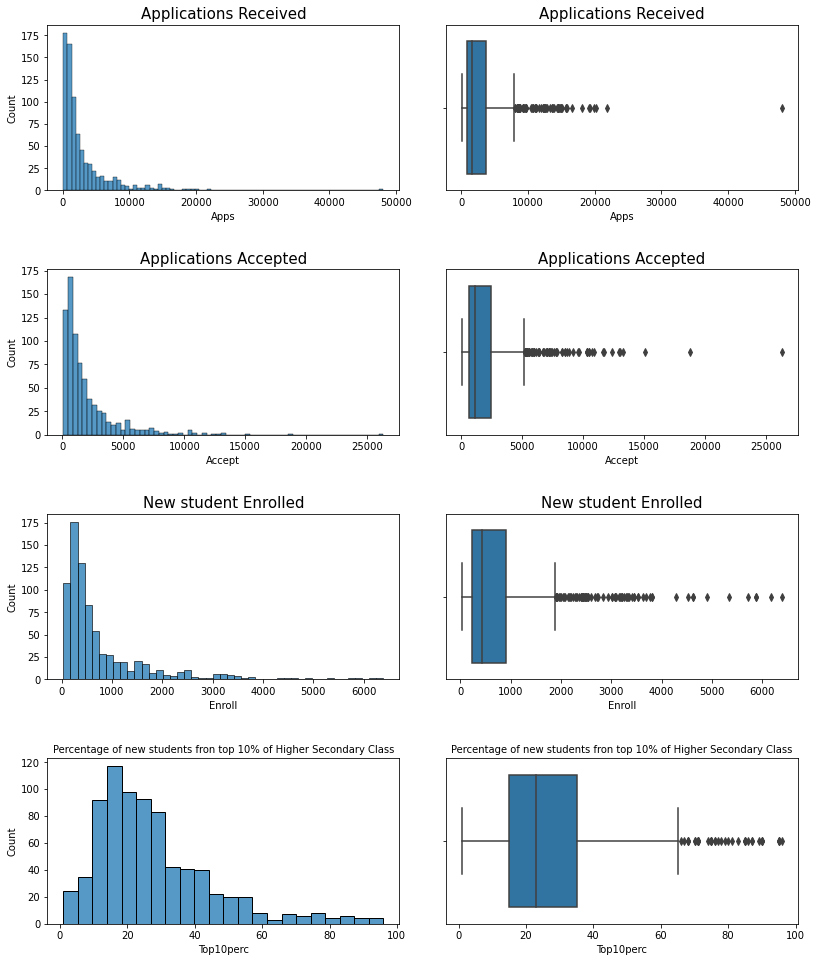

In [30]:
## Univariate

fig, axes = plot.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.histplot(education['Apps'] , ax=axes[0][0])
a.set_title("Applications Received",fontsize=15)
a = sns.boxplot(education['Apps'] , orient = "h" , ax=axes[0][1])
a.set_title("Applications Received",fontsize=15)

a = sns.histplot(education['Accept'] , ax=axes[1][0])
a.set_title("Applications Accepted",fontsize=15)
a = sns.boxplot(education['Accept'] , orient = "h" , ax=axes[1][1])
a.set_title("Applications Accepted",fontsize=15)

a = sns.histplot(education['Enroll'] , ax=axes[2][0])
a.set_title("New student Enrolled",fontsize=15)
a = sns.boxplot(education['Enroll'] , orient = "h" , ax=axes[2][1])
a.set_title("New student Enrolled",fontsize=15)


a = sns.histplot(education['Top10perc'] , ax=axes[3][0])
a.set_title("Percentage of new students fron top 10% of Higher Secondary Class",fontsize=10)
a = sns.boxplot(education['Top10perc'] , orient = "h" , ax=axes[3][1])
a.set_title("Percentage of new students fron top 10% of Higher Secondary Class",fontsize=10)

fig.tight_layout(pad = 3)
plot.show()

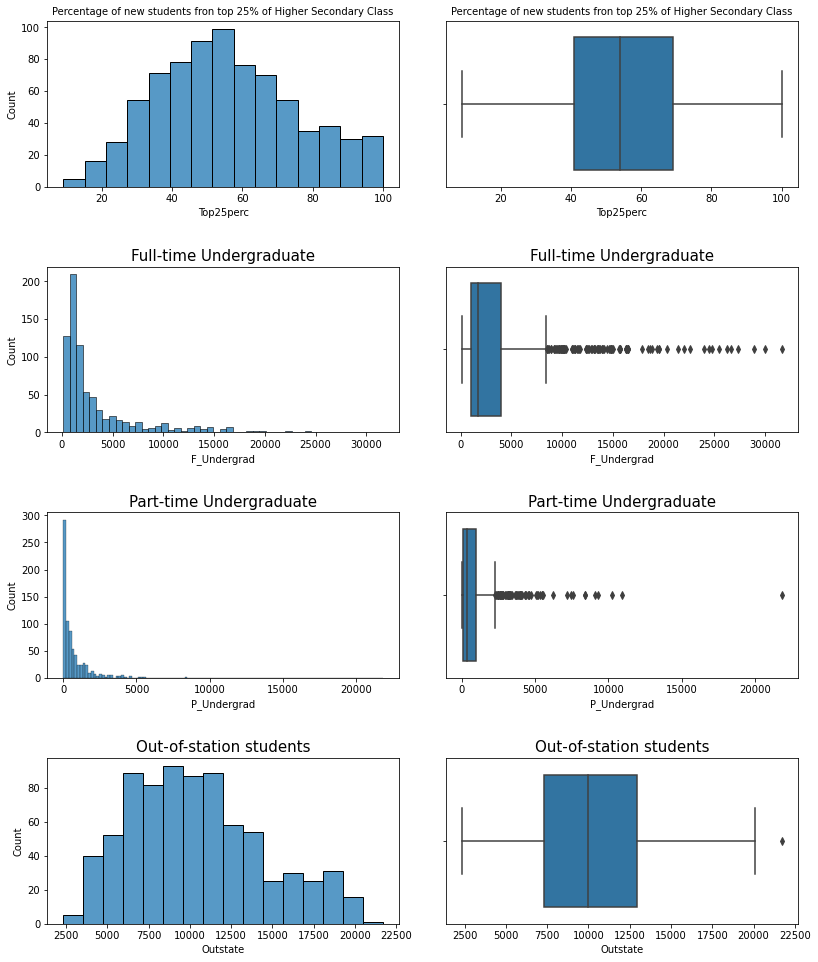

In [31]:
## Univariate

fig, axes = plot.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.histplot(education['Top25perc'] , ax=axes[0][0])
a.set_title("Percentage of new students fron top 25% of Higher Secondary Class",fontsize=10)
a = sns.boxplot(education['Top25perc'] , orient = "h" , ax=axes[0][1])
a.set_title("Percentage of new students fron top 25% of Higher Secondary Class",fontsize=10)

a = sns.histplot(education['F_Undergrad'] , ax=axes[1][0])
a.set_title("Full-time Undergraduate",fontsize=15)
a = sns.boxplot(education['F_Undergrad'] , orient = "h" , ax=axes[1][1])
a.set_title("Full-time Undergraduate",fontsize=15)

a = sns.histplot(education['P_Undergrad'] , ax=axes[2][0])
a.set_title("Part-time Undergraduate",fontsize=15)
a = sns.boxplot(education['P_Undergrad'] , orient = "h" , ax=axes[2][1])
a.set_title("Part-time Undergraduate",fontsize=15)


a = sns.histplot(education['Outstate'] , ax=axes[3][0])
a.set_title("Out-of-station students",fontsize=15)
a = sns.boxplot(education['Outstate'] , orient = "h" , ax=axes[3][1])
a.set_title("Out-of-station students",fontsize=15)

fig.tight_layout(pad = 3)
plot.show()

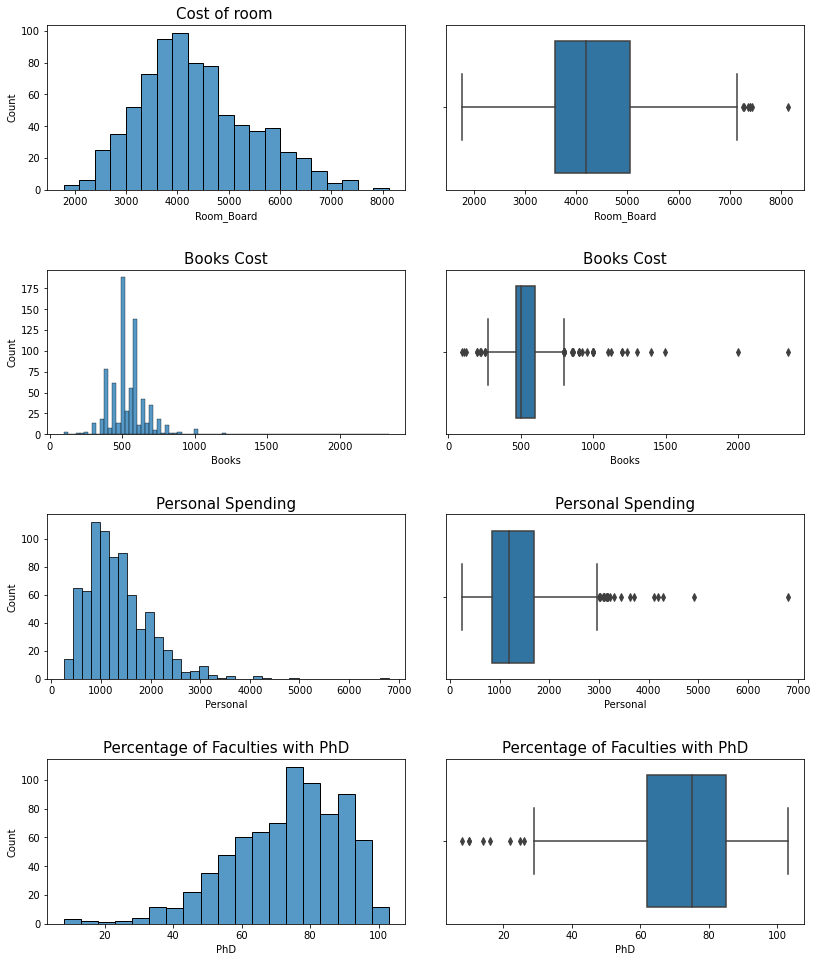

In [32]:
## Univariate

fig, axes = plot.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.histplot(education['Room_Board'] , ax=axes[0][0])
a.set_title("Cost of room ",fontsize=15)
a = sns.boxplot(education['Room_Board'] , orient = "h" , ax=axes[0][1])
a.set_title("",fontsize=15)

a = sns.histplot(education['Books'] , ax=axes[1][0])
a.set_title("Books Cost",fontsize=15)
a = sns.boxplot(education['Books'] , orient = "h" , ax=axes[1][1])
a.set_title("Books Cost",fontsize=15)

a = sns.histplot(education['Personal'] , ax=axes[2][0])
a.set_title("Personal Spending",fontsize=15)
a = sns.boxplot(education['Personal'] , orient = "h" , ax=axes[2][1])
a.set_title("Personal Spending",fontsize=15)


a = sns.histplot(education['PhD'] , ax=axes[3][0])
a.set_title("Percentage of Faculties with PhD",fontsize=15)
a = sns.boxplot(education['PhD'] , orient = "h" , ax=axes[3][1])
a.set_title("Percentage of Faculties with PhD",fontsize=15)

fig.tight_layout(pad = 3)
plot.show()

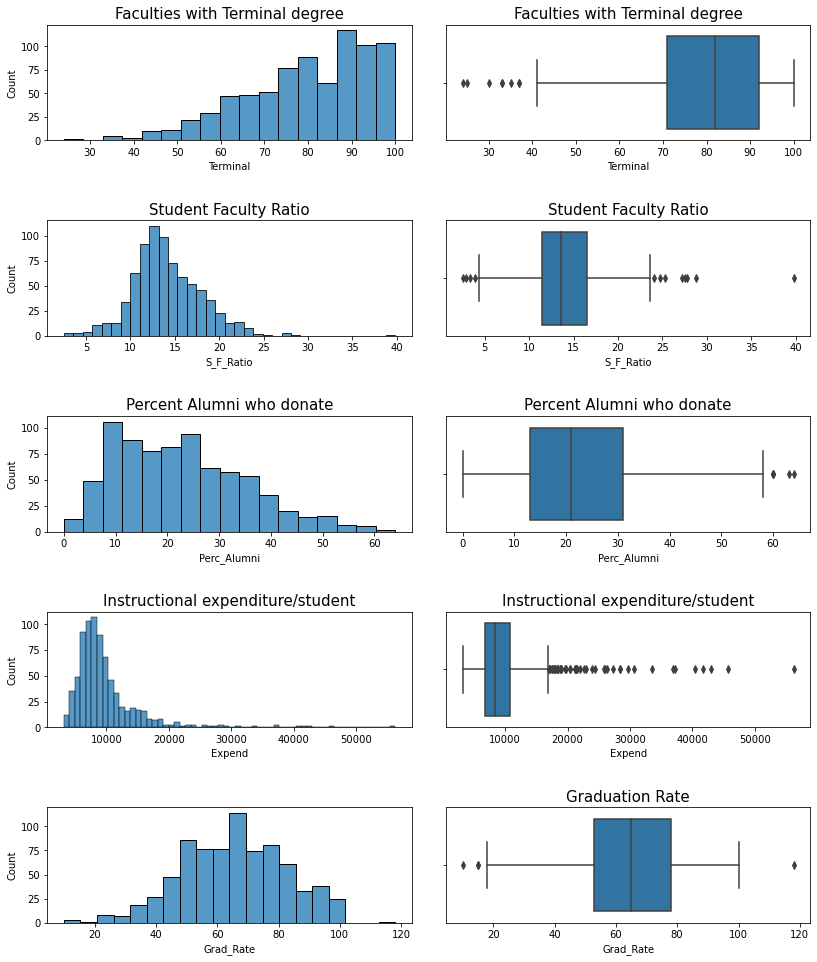

In [33]:
## Univariate

fig, axes = plot.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 14)
a = sns.histplot(education['Terminal'] , ax=axes[0][0])
a.set_title("Faculties with Terminal degree",fontsize=15)
a = sns.boxplot(education['Terminal'] , orient = "h" , ax=axes[0][1])
a.set_title("Faculties with Terminal degree",fontsize=15)

a = sns.histplot(education['S_F_Ratio'] , ax=axes[1][0])
a.set_title("Student Faculty Ratio",fontsize=15)
a = sns.boxplot(education['S_F_Ratio'] , orient = "h" , ax=axes[1][1])
a.set_title("Student Faculty Ratio",fontsize=15)

a = sns.histplot(education['Perc_Alumni'] , ax=axes[2][0])
a.set_title("Percent Alumni who donate",fontsize=15)
a = sns.boxplot(education['Perc_Alumni'] , orient = "h" , ax=axes[2][1])
a.set_title("Percent Alumni who donate",fontsize=15)


a = sns.histplot(education['Expend'] , ax=axes[3][0])
a.set_title("Instructional expenditure/student",fontsize=15)
a = sns.boxplot(education['Expend'] , orient = "h" , ax=axes[3][1])
a.set_title("Instructional expenditure/student",fontsize=15)

sns.histplot(education['Grad_Rate'], ax=axes[4][0])
plot.title("Graduation Rate", fontsize=15)
sns.boxplot(education['Grad_Rate'], orient = 'h', ax=axes[4][1])
plot.title("Graduation Rate", fontsize=15)

fig.tight_layout(pad = 3)
plot.show()

## Bi-Variate Analysis

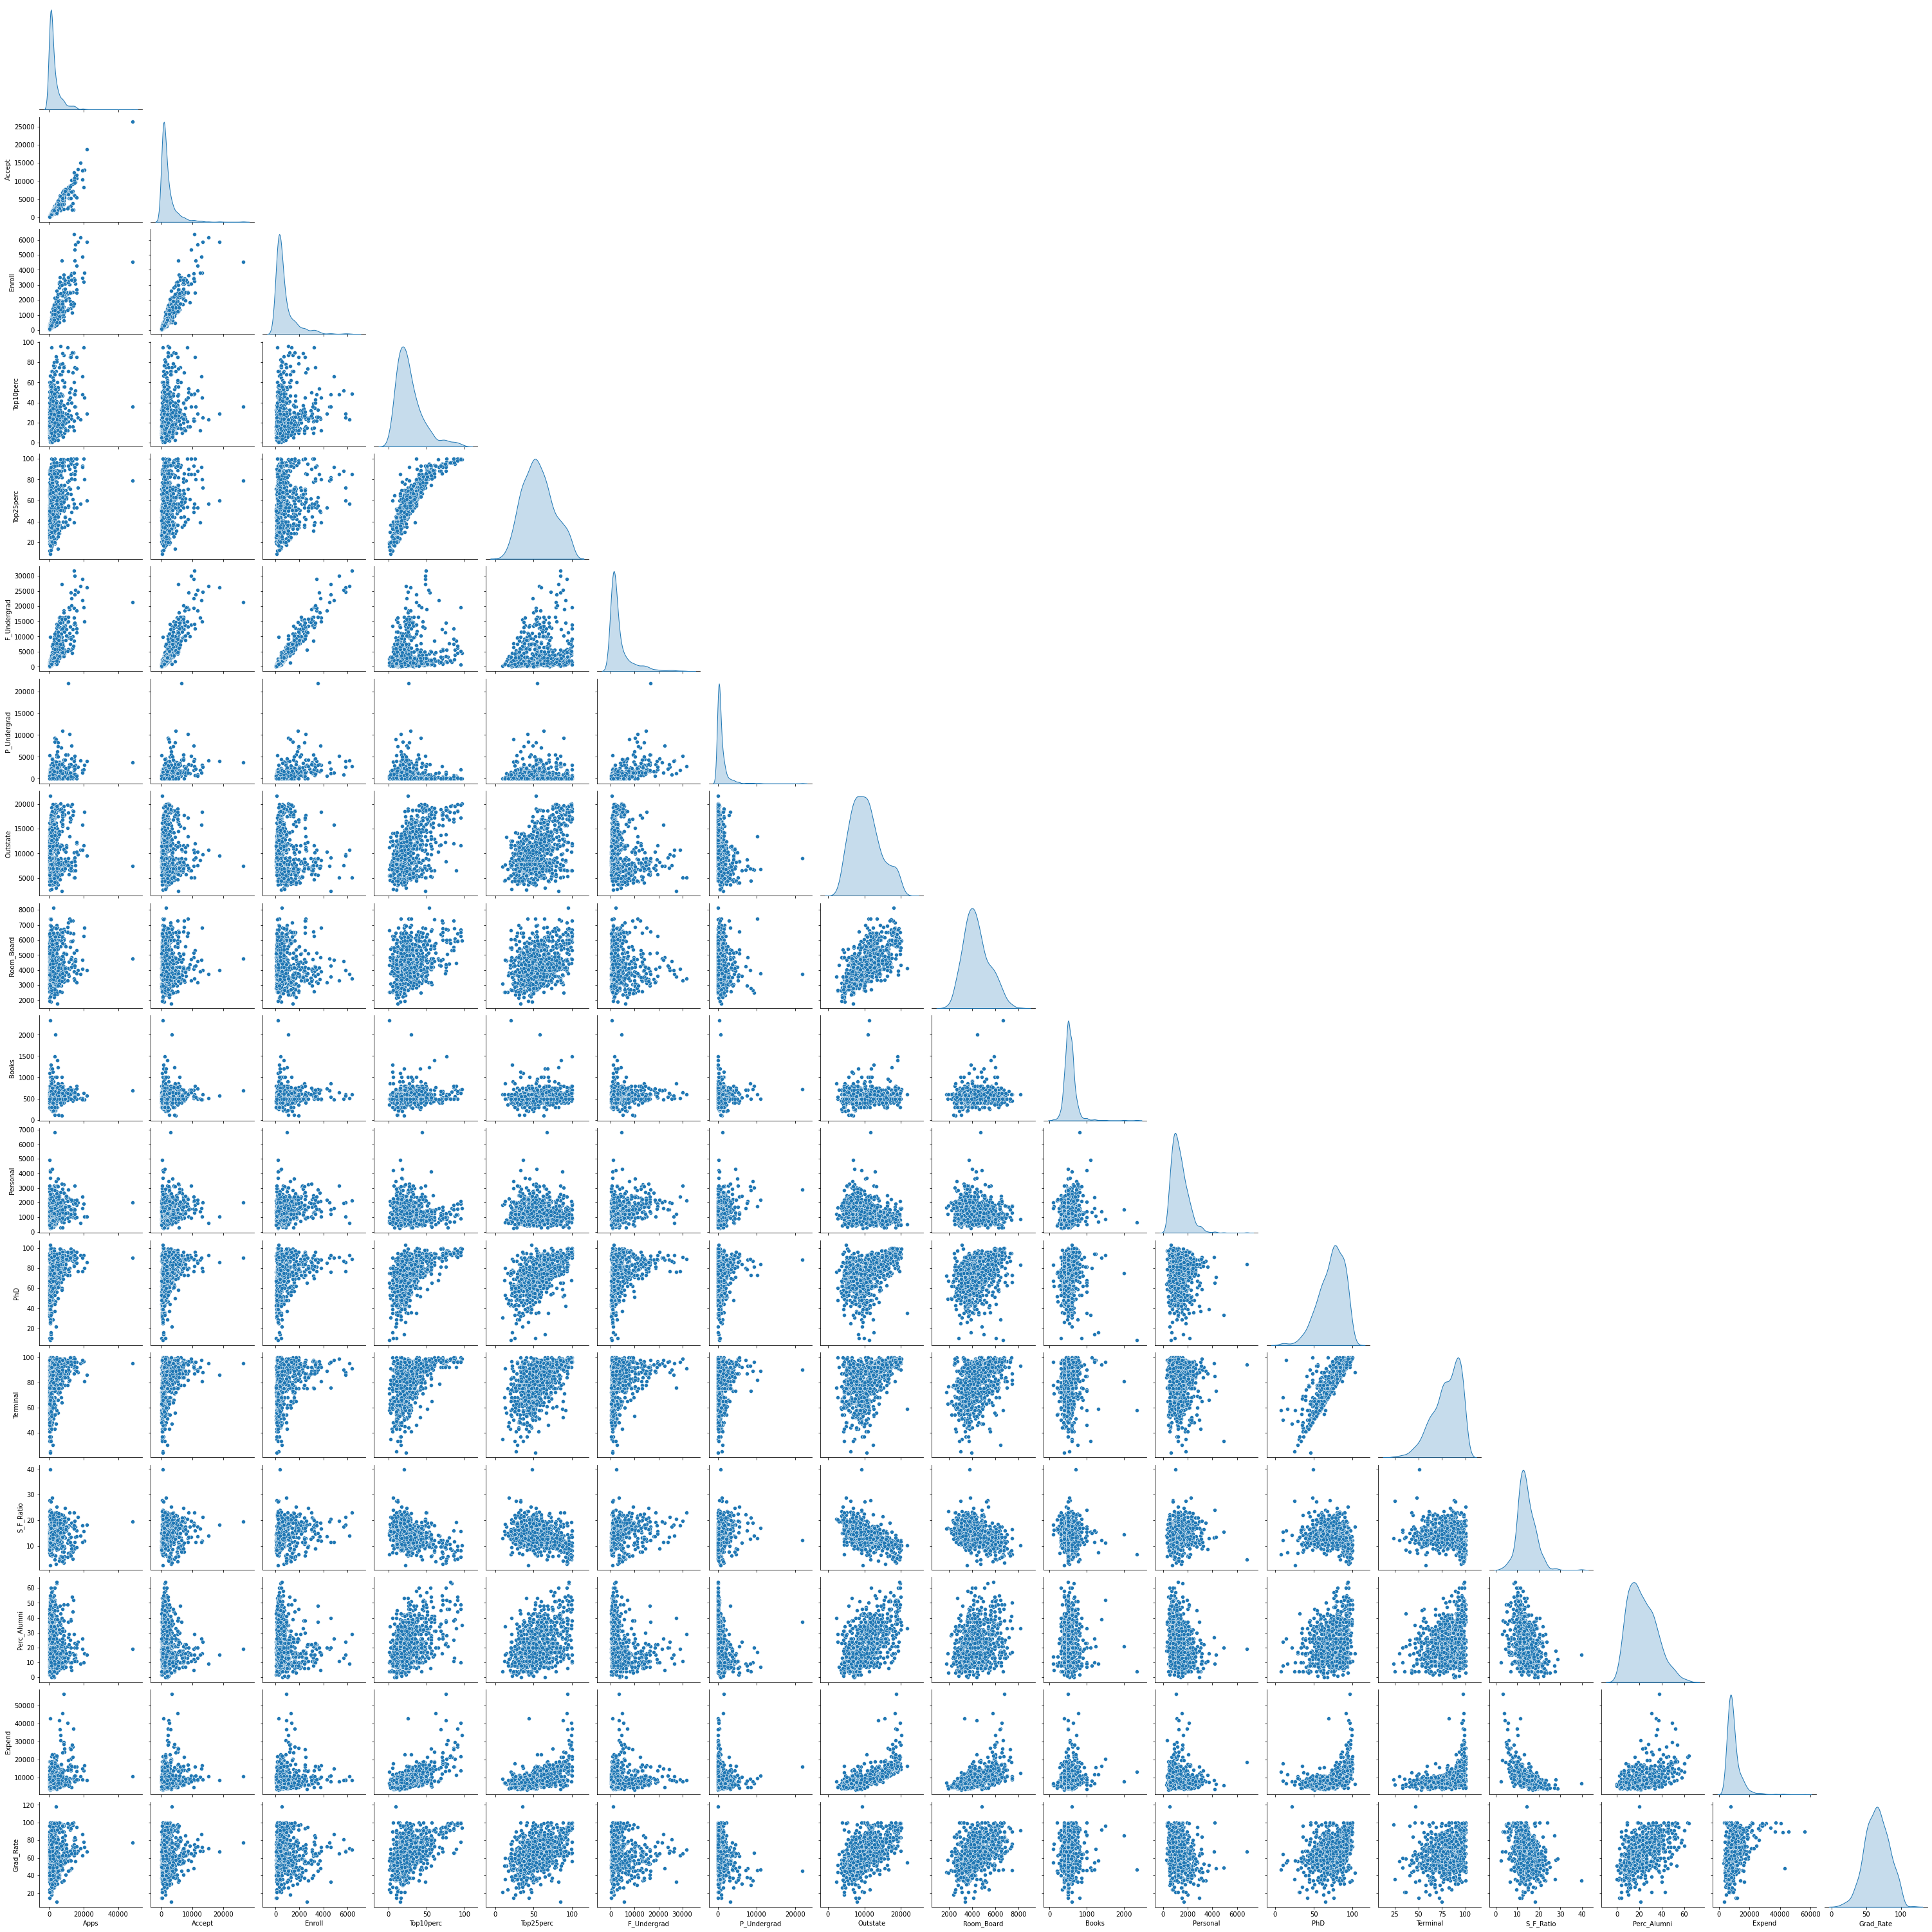

In [34]:
sns.pairplot(data = education, diag_kind = 'kde', corner = True)

In [35]:
print("Variance-Covariance matrix on original data")
np.round(education.cov(),2)

Variance-Covariance matrix on original data


,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,Perc_Alumni,Expend,Grad_Rate
Apps,14978459.53,8949859.81,3045255.99,23132.77,26952.66,15289702.47,2346620.15,780970.36,700072.87,84703.75,468346.83,24689.43,21053.07,1465.06,-4327.12,5246171.10,9756.42
Accept,8949859.81,6007959.70,2076267.76,8321.12,12013.40,10393582.44,1646669.72,-253962.29,244347.15,45942.81,333556.63,14238.20,12182.09,1709.84,-4859.49,1596271.69,2834.16
Enroll,3045255.99,2076267.76,863368.39,2971.58,4172.59,4347529.88,725790.67,-581188.48,-40997.06,17291.20,176737.97,5028.96,4217.09,872.68,-2081.69,311345.43,-356.59
Top10perc,23132.77,8321.12,2971.58,311.18,311.63,12089.11,-2829.47,39907.18,7186.71,346.18,-1114.55,153.18,127.55,-26.87,99.57,60879.31,149.99
Top25perc,26952.66,12013.40,4172.59,311.63,392.23,19158.95,-1615.41,38992.43,7199.90,377.76,-1083.61,176.52,153.00,-23.10,102.55,54546.48,162.37
F_Undergrad,15289702.47,10393582.44,4347529.88,12089.11,19158.95,23526579.33,4212910.09,-4209843.04,-366458.22,92535.76,1041709.09,25211.78,21424.24,5370.21,-13791.93,472403.96,-6563.31
P_Undergrad,2346620.15,1646669.72,725790.67,-2829.47,-1615.41,4212910.09,2317798.85,-1552704.28,-102391.86,20410.45,329732.43,3706.76,3180.60,1401.30,-5297.34,-664351.15,-6721.06
Outstate,780970.36,-253962.29,-581188.48,39907.18,38992.43,-4209843.04,-1552704.28,16184661.63,2886597.39,25808.24,-814673.72,25157.52,24164.15,-8835.25,28229.55,14133235.71,39479.68
Room_Board,700072.87,244347.15,-40997.06,7186.71,7199.90,-366458.22,-102391.86,2886597.39,1202743.03,23170.31,-148083.77,5895.03,6047.30,-1574.21,3701.43,2873308.48,8005.36
Books,84703.75,45942.81,17291.20,346.18,377.76,92535.76,20410.45,25808.24,23170.31,27259.78,20043.03,72.53,242.96,-20.87,-82.26,96912.58,3.01


In [36]:
corr = education.corr()
corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,Perc_Alumni,Expend,Grad_Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F_Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P_Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room_Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


<AxesSubplot:>

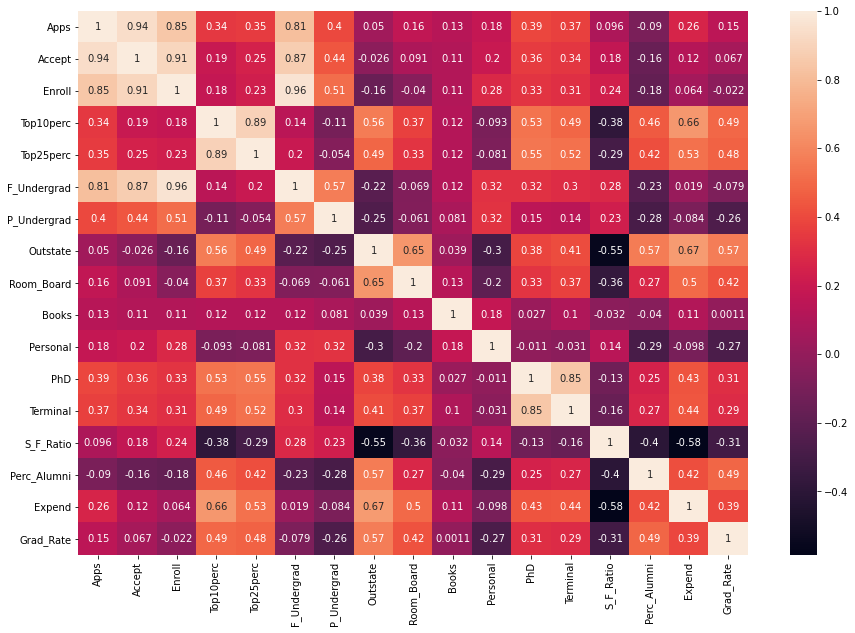

In [37]:
plot.figure(figsize=(15,10))
sns.heatmap(data = corr, annot = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Apps'),
  Text(1, 0, 'Accept'),
  Text(2, 0, 'Enroll'),
  Text(3, 0, 'Top10perc'),
  Text(4, 0, 'Top25perc'),
  Text(5, 0, 'F_Undergrad'),
  Text(6, 0, 'P_Undergrad'),
  Text(7, 0, 'Outstate'),
  Text(8, 0, 'Room_Board'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Personal'),
  Text(11, 0, 'PhD'),
  Text(12, 0, 'Terminal'),
  Text(13, 0, 'S_F_Ratio'),
  Text(14, 0, 'Perc_Alumni'),
  Text(15, 0, 'Expend'),
  Text(16, 0, 'Grad_Rate')])

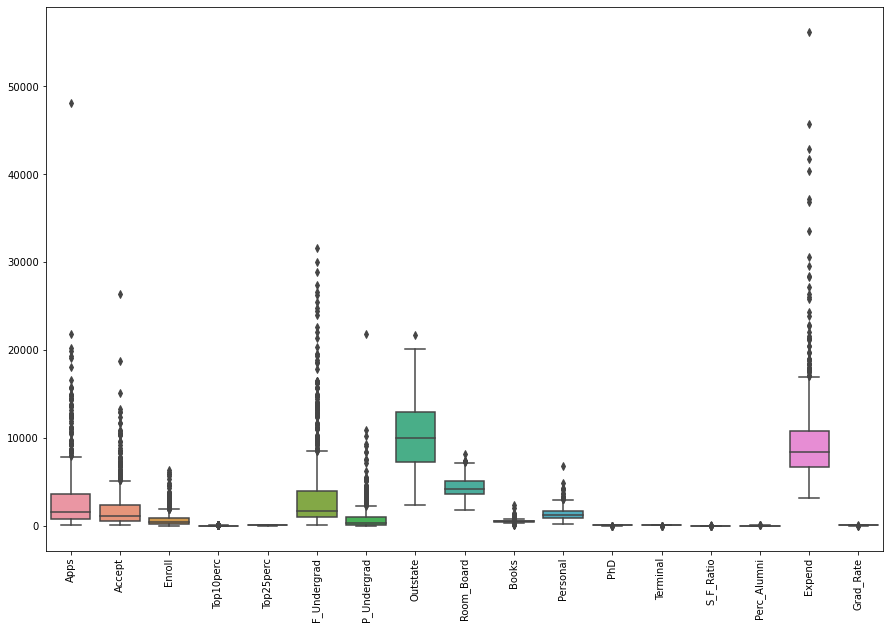

In [38]:
plot.figure(figsize=(15,10))
sns.boxplot(data = education)
plot.xticks(rotation = 90)

In [39]:
from scipy.stats import zscore

In [40]:
scaled_data = education.apply(zscore)
scaled_data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,Perc_Alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [41]:
cov_matrix = scaled_data.cov().T
print("Co-variance matrix of scaled data")
np.round(cov_matrix,3)

Co-variance matrix of scaled data


,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,Perc_Alumni,Expend,Grad_Rate
Apps,1.001,0.945,0.848,0.339,0.352,0.816,0.399,0.050,0.165,0.133,0.179,0.391,0.370,0.096,-0.090,0.260,0.147
Accept,0.945,1.001,0.913,0.193,0.248,0.875,0.442,-0.026,0.091,0.114,0.201,0.356,0.338,0.176,-0.160,0.125,0.067
Enroll,0.848,0.913,1.001,0.182,0.227,0.966,0.514,-0.156,-0.040,0.113,0.281,0.332,0.309,0.238,-0.181,0.064,-0.022
Top10perc,0.339,0.193,0.182,1.001,0.893,0.141,-0.105,0.563,0.372,0.119,-0.093,0.533,0.492,-0.385,0.456,0.662,0.496
Top25perc,0.352,0.248,0.227,0.893,1.001,0.200,-0.054,0.490,0.332,0.116,-0.081,0.547,0.525,-0.295,0.418,0.528,0.478
F_Undergrad,0.816,0.875,0.966,0.141,0.200,1.001,0.571,-0.216,-0.069,0.116,0.318,0.319,0.300,0.280,-0.230,0.019,-0.079
P_Undergrad,0.399,0.442,0.514,-0.105,-0.054,0.571,1.001,-0.254,-0.061,0.081,0.320,0.149,0.142,0.233,-0.281,-0.084,-0.257
Outstate,0.050,-0.026,-0.156,0.563,0.490,-0.216,-0.254,1.001,0.655,0.039,-0.299,0.383,0.409,-0.556,0.567,0.674,0.572
Room_Board,0.165,0.091,-0.040,0.372,0.332,-0.069,-0.061,0.655,1.001,0.128,-0.200,0.330,0.375,-0.363,0.273,0.502,0.425
Books,0.133,0.114,0.113,0.119,0.116,0.116,0.081,0.039,0.128,1.001,0.180,0.027,0.100,-0.032,-0.040,0.113,0.001


In [42]:
print("Correlation of scaled matrix")
np.round(scaled_data.corr(),3)

Correlation of scaled matrix


,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,Perc_Alumni,Expend,Grad_Rate
Apps,1.000,0.943,0.847,0.339,0.352,0.814,0.398,0.050,0.165,0.133,0.179,0.391,0.369,0.096,-0.090,0.260,0.147
Accept,0.943,1.000,0.912,0.192,0.247,0.874,0.441,-0.026,0.091,0.114,0.201,0.356,0.338,0.176,-0.160,0.125,0.067
Enroll,0.847,0.912,1.000,0.181,0.227,0.965,0.513,-0.155,-0.040,0.113,0.281,0.331,0.308,0.237,-0.181,0.064,-0.022
Top10perc,0.339,0.192,0.181,1.000,0.892,0.141,-0.105,0.562,0.371,0.119,-0.093,0.532,0.491,-0.385,0.455,0.661,0.495
Top25perc,0.352,0.247,0.227,0.892,1.000,0.199,-0.054,0.489,0.331,0.116,-0.081,0.546,0.525,-0.295,0.418,0.527,0.477
F_Undergrad,0.814,0.874,0.965,0.141,0.199,1.000,0.571,-0.216,-0.069,0.116,0.317,0.318,0.300,0.280,-0.229,0.019,-0.079
P_Undergrad,0.398,0.441,0.513,-0.105,-0.054,0.571,1.000,-0.254,-0.061,0.081,0.320,0.149,0.142,0.233,-0.281,-0.084,-0.257
Outstate,0.050,-0.026,-0.155,0.562,0.489,-0.216,-0.254,1.000,0.654,0.039,-0.299,0.383,0.408,-0.555,0.566,0.673,0.571
Room_Board,0.165,0.091,-0.040,0.371,0.331,-0.069,-0.061,0.654,1.000,0.128,-0.199,0.329,0.375,-0.363,0.272,0.502,0.425
Books,0.133,0.114,0.113,0.119,0.116,0.116,0.081,0.039,0.128,1.000,0.179,0.027,0.100,-0.032,-0.040,0.112,0.001


<AxesSubplot:>

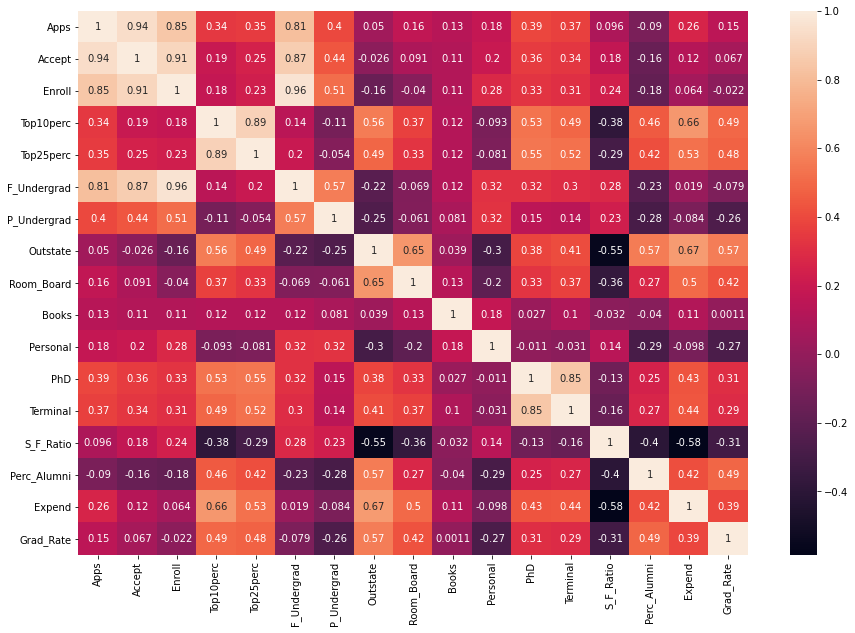

In [43]:
plot.figure(figsize=(15,10))
sns.heatmap(scaled_data.corr(), annot = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Apps'),
  Text(1, 0, 'Accept'),
  Text(2, 0, 'Enroll'),
  Text(3, 0, 'Top10perc'),
  Text(4, 0, 'Top25perc'),
  Text(5, 0, 'F_Undergrad'),
  Text(6, 0, 'P_Undergrad'),
  Text(7, 0, 'Outstate'),
  Text(8, 0, 'Room_Board'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Personal'),
  Text(11, 0, 'PhD'),
  Text(12, 0, 'Terminal'),
  Text(13, 0, 'S_F_Ratio'),
  Text(14, 0, 'Perc_Alumni'),
  Text(15, 0, 'Expend'),
  Text(16, 0, 'Grad_Rate')])

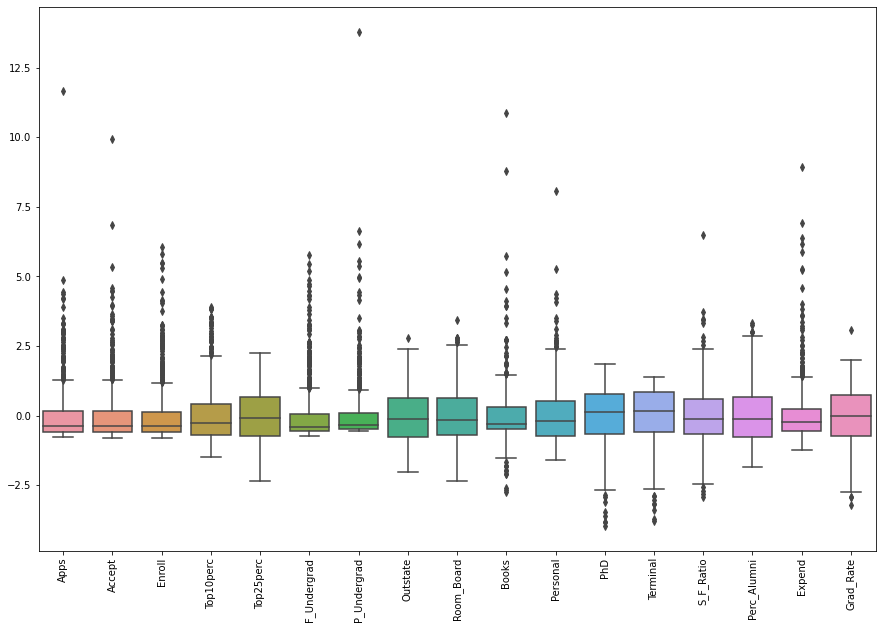

In [44]:
plot.figure(figsize=(15,10))
sns.boxplot(data = scaled_data)
plot.xticks(rotation = 90)

In [45]:
from statsmodels.multivariate.pca import PCA

In [46]:
pca = PCA(scaled_data, standardize = True, normalize = True, missing = None, method = 'eig')

In [47]:
eig_vectors = pca.eigenvecs
print("Eigen Vectors \n")
np.round(eig_vectors,3)

Eigen Vectors 



,eigenvec_00,eigenvec_01,eigenvec_02,eigenvec_03,eigenvec_04,eigenvec_05,eigenvec_06,eigenvec_07,eigenvec_08,eigenvec_09,eigenvec_10,eigenvec_11,eigenvec_12,eigenvec_13,eigenvec_14,eigenvec_15,eigenvec_16
0,-0.249,0.332,-0.063,0.281,0.006,-0.016,0.042,-0.103,0.090,-0.053,-0.043,-0.024,0.596,-0.081,-0.133,0.459,-0.359
1,-0.208,0.372,-0.101,0.268,0.056,0.008,0.013,-0.056,0.178,-0.041,0.058,0.145,0.293,-0.033,0.145,-0.519,0.543
2,-0.176,0.404,-0.083,0.162,-0.056,-0.043,0.028,0.059,0.129,-0.034,0.069,-0.011,-0.445,0.086,-0.030,-0.404,-0.610
3,-0.354,-0.082,0.035,-0.052,-0.395,-0.053,0.161,-0.123,-0.341,-0.064,0.008,-0.039,0.001,0.108,-0.698,-0.149,0.145
4,-0.344,-0.045,-0.024,-0.110,-0.427,0.033,0.118,-0.102,-0.404,-0.015,0.273,0.089,0.022,-0.152,0.617,0.052,-0.080
5,-0.155,0.418,-0.061,0.100,-0.043,-0.043,0.025,0.079,0.059,-0.021,0.081,-0.056,-0.524,0.056,-0.010,0.560,0.415
6,-0.026,0.315,0.140,-0.159,0.302,-0.191,-0.061,0.571,-0.561,0.223,-0.101,0.064,0.126,-0.019,-0.021,-0.053,-0.009
7,-0.295,-0.250,0.047,0.131,0.223,-0.030,-0.109,0.010,0.005,-0.187,-0.143,0.823,-0.142,0.034,-0.038,0.102,-0.051
8,-0.249,-0.138,0.149,0.185,0.561,0.163,-0.210,-0.221,-0.275,-0.298,0.359,-0.355,-0.070,0.058,-0.003,-0.026,-0.001
9,-0.065,0.056,0.677,0.087,-0.127,0.641,0.150,0.213,0.134,0.082,-0.032,0.028,0.011,0.067,0.009,0.003,-0.001


In [48]:
eig_values = np.linalg.eigvals(cov_matrix)
print("Eigen-Values")
np.round(eig_values, 3)

Eigen-Values


array([5.451, 4.484, 1.175, 1.008, 0.934, 0.848, 0.606, 0.588, 0.531,
       0.404, 0.023, 0.037, 0.313, 0.088, 0.144, 0.168, 0.221])

In [49]:
total = sum(eig_values)
variance = [(i / total) * 100 for i in sorted(eig_values, reverse = True)]
print("Variance explained by each eigen values")
np.array(variance)

Variance explained by each eigen values


array([32.0206282 , 26.34021444,  6.90091655,  5.92298922,  5.48840511,
        4.98470095,  3.55887149,  3.45362134,  3.11723368,  2.37519153,
        1.84142632,  1.2960414 ,  0.98575412,  0.84584234,  0.51712558,
        0.21575401,  0.13528372])

In [50]:
cum_variance = np.cumsum(variance)
print("Cummulative variance explained")
cum_variance

Cummulative variance explained


array([ 32.0206282 ,  58.36084263,  65.26175919,  71.18474841,
        76.67315352,  81.65785448,  85.21672597,  88.67034731,
        91.78758099,  94.16277251,  96.00419883,  97.30024023,
        98.28599436,  99.13183669,  99.64896227,  99.86471628,
       100.        ])

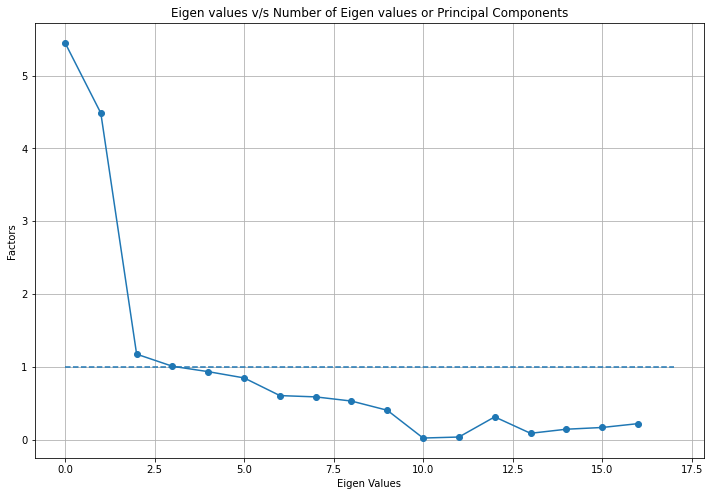

In [51]:
plot.figure(figsize=(12,8))
plot.plot(eig_values, marker = 'o')
plot.grid()
plot.xlabel("Eigen Values")
plot.ylabel("Factors")
plot.title("Eigen values v/s Number of Eigen values or Principal Components")
plot.hlines(xmin = 0, xmax = 17, y = 1, linestyle = 'dashed')

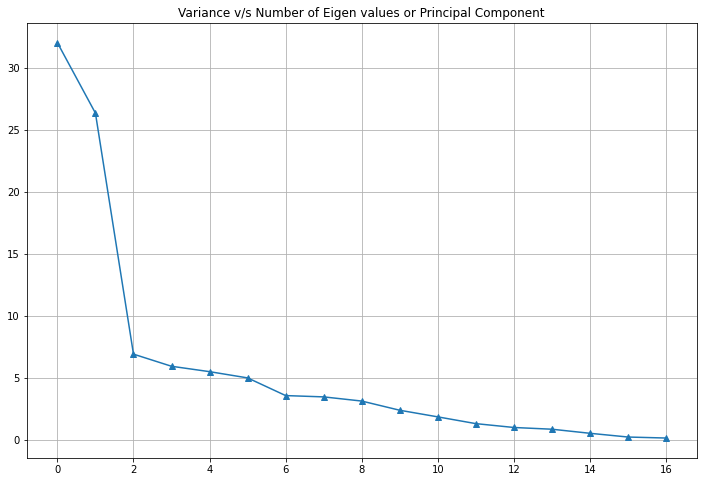

In [52]:
plot.figure(figsize=(12,8))
plot.plot(variance, marker = '^')
plot.title("Variance v/s Number of Eigen values or Principal Component")
plot.grid()

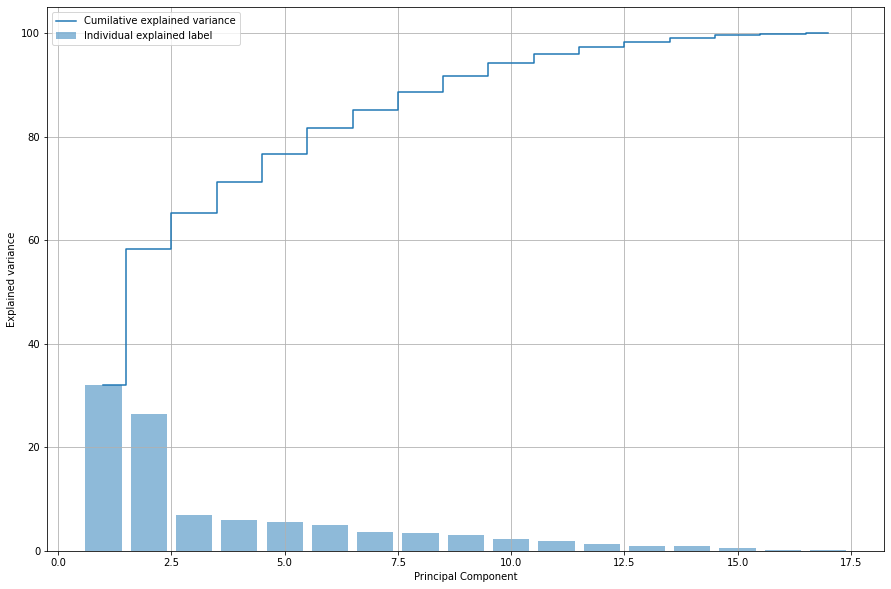

In [53]:
plot.figure(figsize=(15,10))
plot.bar(range(1, eig_values.size+1), variance, alpha=0.5, align='center', label = 'Individual explained label')
plot.step(range(1, eig_values.size+1), cum_variance, where = 'mid', label = 'Cumilative explained variance')
plot.xlabel("Principal Component")
plot.ylabel("Explained variance")
plot.legend(loc = 'best')
plot.grid()
plot.show()

## Calculation of Principal Components

In [54]:
pca = PCA(education, ncomp = 5, standardize = True, normalize = False, missing = None, method = 'eig')

In [55]:
education_comp = pca.loadings
education_comp

,comp_0,comp_1,comp_2,comp_3,comp_4
Apps,-0.248766,0.331598,-0.063092,0.281311,0.005741
Accept,-0.207602,0.372117,-0.101249,0.267817,0.055786
Enroll,-0.176304,0.403724,-0.082986,0.161827,-0.055694
Top10perc,-0.354274,-0.082412,0.035056,-0.051547,-0.395434
Top25perc,-0.344001,-0.044779,-0.024148,-0.109767,-0.426534
F_Undergrad,-0.154641,0.417674,-0.061393,0.100412,-0.043454
P_Undergrad,-0.026443,0.315088,0.139682,-0.158558,0.302385
Outstate,-0.294736,-0.249644,0.046599,0.131291,0.222532
Room_Board,-0.249030,-0.137809,0.148967,0.184996,0.560919
Books,-0.064758,0.056342,0.677412,0.087089,-0.127289


In [59]:
e_vecs = np.array(eig_vectors)
e_vecs

array([[-2.48765602e-01,  3.31598227e-01, -6.30921033e-02,
         2.81310530e-01,  5.74140964e-03, -1.62374420e-02,
         4.24863486e-02, -1.03090398e-01,  9.02270802e-02,
        -5.25098025e-02, -4.30462074e-02, -2.40709086e-02,
         5.95830975e-01, -8.06328039e-02, -1.33405806e-01,
         4.59139498e-01, -3.58970400e-01],
       [-2.07601502e-01,  3.72116750e-01, -1.01249056e-01,
         2.67817346e-01,  5.57860920e-02,  7.53468452e-03,
         1.29497196e-02, -5.62709623e-02,  1.77864814e-01,
        -4.11400844e-02,  5.84055850e-02,  1.45102446e-01,
         2.92642398e-01, -3.34674281e-02,  1.45497511e-01,
        -5.18568789e-01,  5.43427250e-01],
       [-1.76303592e-01,  4.03724252e-01, -8.29855709e-02,
         1.61826771e-01, -5.56936353e-02, -4.25579803e-02,
         2.76928937e-02,  5.86623552e-02,  1.28560713e-01,
        -3.44879147e-02,  6.93988831e-02, -1.11431545e-02,
        -4.44638207e-01,  8.56967180e-02, -2.95896092e-02,
        -4.04318439e-01, -6.0

In [60]:
#Explicit form of first principal component
print('The first eigen vector is:')
counter = 0
for i in range(0, len(e_vecs[0])):
    counter = counter+1
    if(counter != len(e_vecs[0])):
        print(e_vecs[0,i],'*',education.columns[i],"+")
    else:
        print(e_vecs[0,i],'*',education.columns[i])

The first eigen vector is:
-0.24876560150819113 * Apps +
0.33159822736214273 * Accept +
-0.06309210328663187 * Enroll +
0.281310530277271 * Top10perc +
0.005741409636458542 * Top25perc +
-0.01623744203230219 * F_Undergrad +
0.0424863486477231 * P_Undergrad +
-0.10309039762750066 * Outstate +
0.09022708015872608 * Room_Board +
-0.05250980251073012 * Books +
-0.0430462074370979 * Personal +
-0.02407090859858855 * PhD +
0.5958309745342727 * Terminal +
-0.08063280389555458 * S_F_Ratio +
-0.13340580587533502 * Perc_Alumni +
0.45913949831358425 * Expend +
-0.3589703995612772 * Grad_Rate


In [61]:
x_reduced = pca.factors
np.round(x_reduced,3)

,comp_0,comp_1,comp_2,comp_3,comp_4
0,1.593,0.767,-0.101,-0.922,-0.744
1,2.192,-0.579,2.279,3.589,1.060
2,1.431,-1.093,-0.438,0.677,-0.370
3,-2.856,-2.631,0.142,-1.295,-0.184
4,2.212,0.022,2.387,-1.115,0.684
...,...,...,...,...,...
772,3.328,1.220,-0.383,0.109,0.777
773,-0.199,-0.687,0.052,0.562,0.375
774,0.733,-0.077,-0.000,0.054,-0.516
775,-7.919,-2.068,2.074,0.852,-0.948


In [62]:
x_reduced_corr  = x_reduced.corr()
np.round(x_reduced_corr,4)

,comp_0,comp_1,comp_2,comp_3,comp_4
comp_0,1.0,0.0,-0.0,0.0,0.0
comp_1,0.0,1.0,-0.0,0.0,0.0
comp_2,-0.0,-0.0,1.0,0.0,0.0
comp_3,0.0,0.0,0.0,1.0,0.0
comp_4,0.0,0.0,0.0,0.0,1.0


In [63]:
# The correlations among the first 5 PCs with the original 17 features.
result = pd.concat((scaled_data, x_reduced), axis = 1).corr()
np.round(result.iloc[:17, 17:22], 3)

,comp_0,comp_1,comp_2,comp_3,comp_4
Apps,-0.580,0.702,-0.068,0.282,0.006
Accept,-0.484,0.787,-0.110,0.269,0.054
Enroll,-0.411,0.854,-0.090,0.162,-0.054
Top10perc,-0.827,-0.174,0.038,-0.052,-0.382
Top25perc,-0.803,-0.095,-0.026,-0.110,-0.412
F_Undergrad,-0.361,0.884,-0.066,0.101,-0.042
P_Undergrad,-0.062,0.667,0.151,-0.159,0.292
Outstate,-0.688,-0.528,0.050,0.132,0.215
Room_Board,-0.581,-0.292,0.161,0.186,0.542
Books,-0.151,0.119,0.734,0.087,-0.123


<AxesSubplot:>

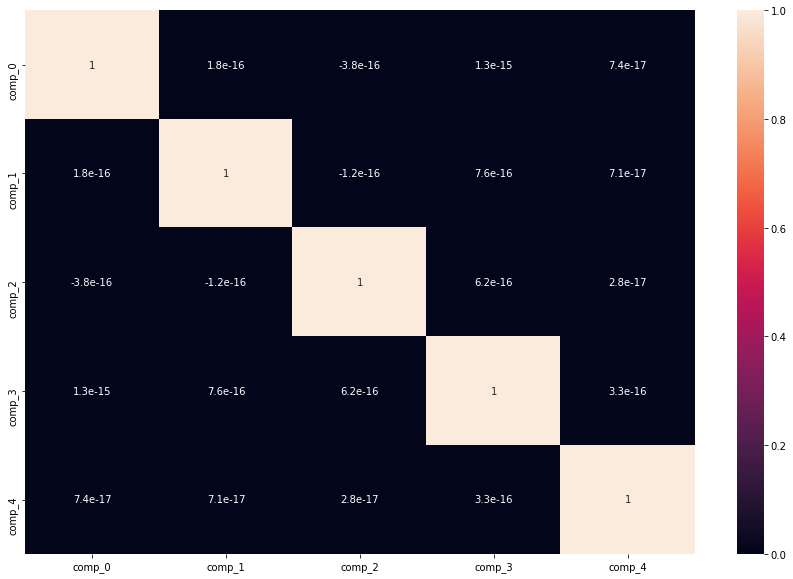

In [64]:
plot.figure(figsize=(15,10))
sns.heatmap(x_reduced_corr, annot = True)